#📌 Extracão

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json


url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

dados = pd.read_json(url)

dados.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Separando e reestruturando as colunas com dados aninhados
clientes_df = pd.concat([
    dados.drop(columns=['customer', 'phone', 'internet', 'account']),
    pd.json_normalize(dados['customer']).add_prefix('cliente_'),
    pd.json_normalize(dados['phone']).add_prefix('telefone_'),
    pd.json_normalize(dados['internet']).add_prefix('internet_'),
    pd.json_normalize(dados['account']).add_prefix('conta_')
], axis=1)

clientes_df.head()


,customerID,Churn,cliente_gender,cliente_SeniorCitizen,cliente_Partner,cliente_Dependents,cliente_tenure,telefone_PhoneService,telefone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,conta_Contract,conta_PaperlessBilling,conta_PaymentMethod,conta_Charges.Monthly,conta_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [5]:
# Exibe informações gerais do DataFrame
print("Resumo da estrutura dos dados:")
clientes_df.info()


Resumo da estrutura dos dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   cliente_gender             7267 non-null   object 
 3   cliente_SeniorCitizen      7267 non-null   int64  
 4   cliente_Partner            7267 non-null   object 
 5   cliente_Dependents         7267 non-null   object 
 6   cliente_tenure             7267 non-null   int64  
 7   telefone_PhoneService      7267 non-null   object 
 8   telefone_MultipleLines     7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupp

In [4]:
# Contagem de registros com dados faltantes
faltantes = clientes_df.isna().any(axis=1).sum()
print(f"Total de registros com dados nulos: {faltantes}")

# Eliminação das linhas com valores ausentes, se necessário
if faltantes > 0:
    clientes_df = clientes_df.dropna()
    print(f"Dados limpos — nova dimensão: {clientes_df.shape}")
else:
    print("Não há registros com dados faltantes.")


Total de registros com dados nulos: 0
Não há registros com dados faltantes.


In [6]:
# Verificando registros repetidos
qtd_duplicados = clientes_df.duplicated().sum()
print(f"Registros duplicados encontrados: {qtd_duplicados}")

# Remoção dos registros duplicados, se houver
if qtd_duplicados > 0:
    clientes_df = clientes_df.drop_duplicates()
    print(f"Duplicatas eliminadas. Tamanho atual: {clientes_df.shape}")


Registros duplicados encontrados: 0


In [7]:
# Quantidade de valores nulos por coluna
faltantes_por_coluna = clientes_df.isna().sum()
print("Valores ausentes por atributo:")
print(faltantes_por_coluna)


Valores ausentes por atributo:
customerID                   0
Churn                        0
cliente_gender               0
cliente_SeniorCitizen        0
cliente_Partner              0
cliente_Dependents           0
cliente_tenure               0
telefone_PhoneService        0
telefone_MultipleLines       0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
conta_Contract               0
conta_PaperlessBilling       0
conta_PaymentMethod          0
conta_Charges.Monthly        0
conta_Charges.Total          0
dtype: int64


In [8]:
# Criando uma cópia final do DataFrame para análise
dados_refinados = clientes_df.copy()


In [11]:
print(dados_refinados.columns.tolist())


['customerID', 'Churn', 'cliente_gender', 'cliente_SeniorCitizen', 'cliente_Partner', 'cliente_Dependents', 'cliente_tenure', 'telefone_PhoneService', 'telefone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'conta_Contract', 'conta_PaperlessBilling', 'conta_PaymentMethod', 'conta_Charges.Monthly', 'conta_Charges.Total']


In [12]:
# Cálculo do gasto diário aproximado com base na cobrança mensal
dados_refinados['Gasto_Diario'] = dados_refinados['conta_Charges.Monthly'] / 30

# Visualizando as primeiras linhas com a nova coluna criada
dados_refinados.head()


,customerID,Churn,cliente_gender,cliente_SeniorCitizen,cliente_Partner,cliente_Dependents,cliente_tenure,telefone_PhoneService,telefone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,conta_Contract,conta_PaperlessBilling,conta_PaymentMethod,conta_Charges.Monthly,conta_Charges.Total,Gasto_Diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [14]:
# Renomeando colunas para facilitar a leitura e análise
dados_refinados = dados_refinados.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelado',
    'cliente_gender': 'Sexo',
    'cliente_SeniorCitizen': 'Idoso',
    'cliente_Partner': 'Parceiro',
    'cliente_Dependents': 'Dependentes',
    'cliente_tenure': 'Meses_Contrato',
    'telefone_PhoneService': 'Servico_Telefonico',
    'telefone_MultipleLines': 'Multiplas_Linhas',
    'internet_InternetService': 'Servico_Internet',
    'internet_OnlineSecurity': 'Seguranca_Online',
    'internet_OnlineBackup': 'Backup_Online',
    'internet_DeviceProtection': 'Protecao_Dispositivo',
    'internet_TechSupport': 'Suporte_Tecnico',
    'internet_StreamingTV': 'Streaming_TV',
    'internet_StreamingMovies': 'Streaming_Filmes',
    'conta_Contract': 'Tipo_Contrato',
    'conta_PaperlessBilling': 'Fatura_Online',
    'conta_PaymentMethod': 'Forma_Pagamento',
    'conta_Charges.Monthly': 'Gasto_Mensal',
    'conta_Charges.Total': 'Gasto_Total'
})


In [15]:
# Exibindo a lista atualizada de colunas após renomear
print(dados_refinados.columns.tolist())


['ID_Cliente', 'Cancelado', 'Sexo', 'Idoso', 'Parceiro', 'Dependentes', 'Meses_Contrato', 'Servico_Telefonico', 'Multiplas_Linhas', 'Servico_Internet', 'Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo', 'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Online', 'Forma_Pagamento', 'Gasto_Mensal', 'Gasto_Total', 'Gasto_Diario']


In [16]:
# Eliminando registros com dados faltantes
dados_refinados.dropna(inplace=True)

# Visualizando os dados após a limpeza
dados_refinados.head()


,ID_Cliente,Cancelado,Sexo,Idoso,Parceiro,Dependentes,Meses_Contrato,Servico_Telefonico,Multiplas_Linhas,Servico_Internet,...,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Online,Forma_Pagamento,Gasto_Mensal,Gasto_Total,Gasto_Diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


#📊 Carga e análise

In [17]:
# Estrutura geral do DataFrame após o pré-processamento
print("Informações sobre o conjunto de dados:")
dados_refinados.info()


Informações sobre o conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelado             7267 non-null   object 
 2   Sexo                  7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Parceiro              7267 non-null   object 
 5   Dependentes           7267 non-null   object 
 6   Meses_Contrato        7267 non-null   int64  
 7   Servico_Telefonico    7267 non-null   object 
 8   Multiplas_Linhas      7267 non-null   object 
 9   Servico_Internet      7267 non-null   object 
 10  Seguranca_Online      7267 non-null   object 
 11  Backup_Online         7267 non-null   object 
 12  Protecao_Dispositivo  7267 non-null   object 
 13  Suporte_Tecnico       7267 non-null   object 
 14  Streaming_TV          7267 non-nu

In [20]:
# Substituindo vírgulas por pontos (se houver) e convertendo para float
dados_refinados['Gasto_Total'] = dados_refinados['Gasto_Total'].str.replace(',', '.', regex=False)
dados_refinados['Gasto_Total'] = pd.to_numeric(dados_refinados['Gasto_Total'], errors='coerce')


In [26]:
dados_refinados['Cancelado_Numero'] = dados_refinados['Cancelado'].map({'Yes': 1, 'No': 0})


In [27]:
# Calculando a taxa geral de cancelamento
taxa_cancelamento = dados_refinados['Cancelado_Numero'].mean()

# Exibindo o resultado em percentual formatado
print(f"Taxa de cancelamento: {taxa_cancelamento * 100:.1f}%")


Taxa de cancelamento: 26.5%


In [28]:
dados_analise_final = dados_refinados.copy()
dados_analise_final['Gasto_Total'] = dados_analise_final['Gasto_Total'].replace(' ', np.nan)
dados_analise_final['Gasto_Total'] = pd.to_numeric(dados_analise_final['Gasto_Total'], errors='coerce')
dados_analise_final.dropna(inplace=True)
dados_analise_final.shape


(7032, 23)

In [29]:
# Cálculo da taxa de cancelamento entre idosos e não idosos
taxa_cancelamento_idosos = dados_analise_final.groupby('Idoso')['Cancelado_Numero'].mean() * 100

# Renomeando os índices para leitura mais clara
taxa_cancelamento_idosos.index = ['Não Idosos', 'Idosos']

# Exibindo os resultados formatados
print("Cancelamentos por faixa etária:")
for grupo, percentual in taxa_cancelamento_idosos.items():
    print(f"{grupo}: {percentual:.2f}%")


Cancelamentos por faixa etária:
Não Idosos: 23.65%
Idosos: 41.68%


/tmp/ipython-input-33-4250397465.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_churn, x='Status', y='Total', palette='Set2')


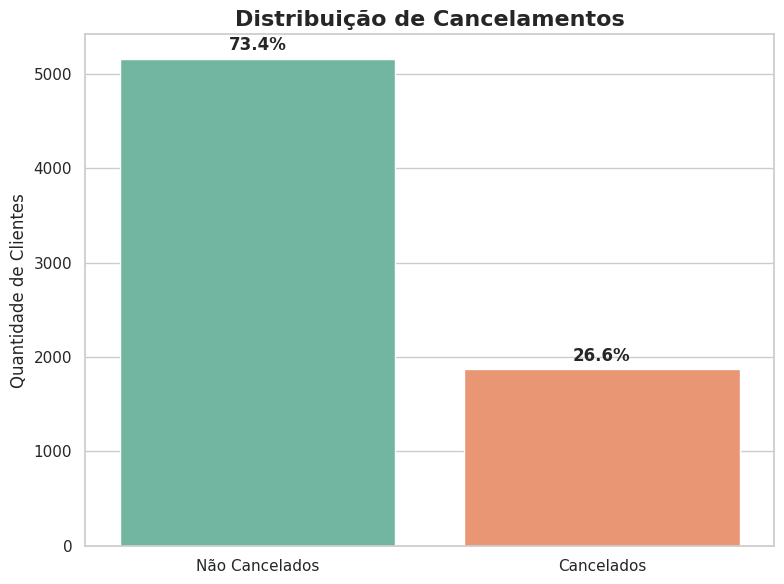

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preparando os dados
contagem = dados_analise_final['Cancelado'].value_counts().sort_index()
percentuais = (contagem / contagem.sum() * 100).round(1)
df_churn = pd.DataFrame({
    'Status': ['Não Cancelados', 'Cancelados'],
    'Total': contagem.values,
    'Porcentagem': percentuais.values
})

# Estilo visual
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_churn, x='Status', y='Total', palette='Set2')

# Anotando porcentagens acima das barras
for i, row in df_churn.iterrows():
    ax.text(i, row['Total'] + 50, f"{row['Porcentagem']}%", ha='center', va='bottom',
            fontsize=12, fontweight='bold')

plt.title('Distribuição de Cancelamentos', fontsize=16, weight='bold')
plt.ylabel('Quantidade de Clientes')
plt.xlabel('')
plt.tight_layout()
plt.show()


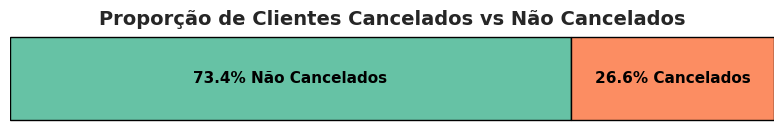

In [34]:
# Preparando os dados
contagem = dados_analise_final['Cancelado'].value_counts()
porcentagem = (contagem / contagem.sum() * 100).round(1)

# Criando DataFrame para visualização
df_prop = pd.DataFrame({
    'Status': ['Não Cancelados', 'Cancelados'],
    'Porcentagem': [porcentagem['No'], porcentagem['Yes']]
})

# Estilo
sns.set(style="white")

# Gráfico de barras horizontal com 100% stacked look
plt.figure(figsize=(8, 1.5))
colors = ['#66c2a5', '#fc8d62']
plt.barh(['Clientes'], df_prop['Porcentagem'], color=colors, edgecolor='black', height=0.5, left=[0, df_prop['Porcentagem'][0]])

# Adiciona rótulos no gráfico
plt.text(df_prop['Porcentagem'][0] / 2, 0, f"{df_prop['Porcentagem'][0]}% Não Cancelados", va='center', ha='center', fontsize=11, color='black', weight='bold')
plt.text(100 - df_prop['Porcentagem'][1] / 2, 0, f"{df_prop['Porcentagem'][1]}% Cancelados", va='center', ha='center', fontsize=11, color='black', weight='bold')

# Ajustes finais
plt.xlim(0, 100)
plt.xticks([])
plt.yticks([])
plt.title('Proporção de Clientes Cancelados vs Não Cancelados', fontsize=14, weight='bold')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [37]:
def grafico_churn_por_categoria(coluna, df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Agrupar por categoria e calcular % de cancelamento
    dados = df.groupby([coluna, 'Cancelado']).size().reset_index(name='Total')
    total_por_categoria = df[coluna].value_counts().to_dict()
    dados['Porcentagem'] = dados.apply(
        lambda row: (row['Total'] / total_por_categoria[row[coluna]]) * 100, axis=1
    )

    # Gráfico
    plt.figure(figsize=(8, 5))
    sns.barplot(data=dados, x=coluna, y='Porcentagem', hue='Cancelado', palette='Set2')

    plt.title(f'Taxa de Churn por {coluna}', fontsize=14, weight='bold')
    plt.ylabel('Porcentagem (%)')
    plt.xlabel('')
    plt.legend(title='Cancelamento')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()



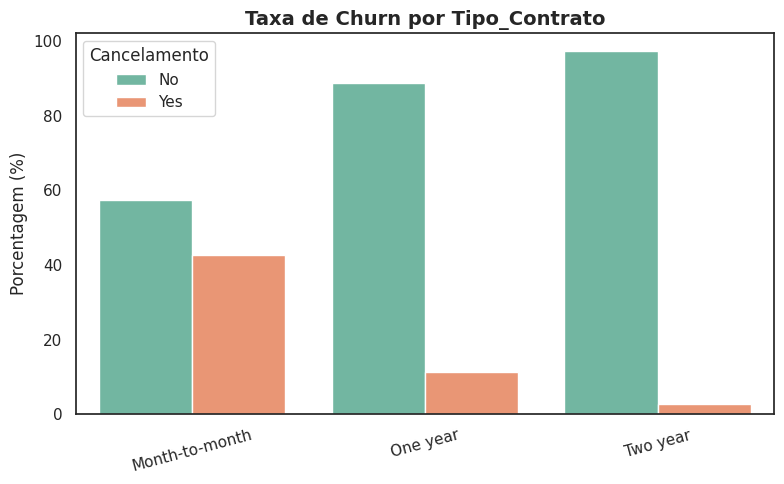

In [38]:
grafico_churn_por_categoria('Tipo_Contrato', dados_analise_final)


In [40]:
def grafico_churn_detalhado(coluna, df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Calcula % de cancelamento por categoria
    grupo = df.groupby([coluna, 'Cancelado']).size().reset_index(name='Total')
    total_cat = df[coluna].value_counts().to_dict()
    grupo['Percentual'] = grupo.apply(
        lambda row: (row['Total'] / total_cat[row[coluna]]) * 100, axis=1
    )

    # Filtra apenas quem cancelou (Yes)
    cancelados = grupo[grupo['Cancelado'] == 'Yes'].sort_values(by='Percentual', ascending=False)

    # Gráfico
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    ax = sns.barplot(data=cancelados, x='Percentual', y=coluna, palette='Reds')

    # Adiciona rótulos com % na ponta da barra
    for i in ax.patches:
        ax.text(i.get_width() + 0.5, i.get_y() + i.get_height()/2,
                f'{i.get_width():.1f}%', va='center', fontsize=11)

    plt.title(f'Taxa de Cancelamento por {coluna}', fontsize=15, weight='bold')
    plt.xlabel('Churn (%)')
    plt.ylabel('')
    plt.xlim(0, cancelados['Percentual'].max() + 10)
    plt.tight_layout()
    plt.show()



/tmp/ipython-input-40-3975615643.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=cancelados, x='Percentual', y=coluna, palette='Reds')


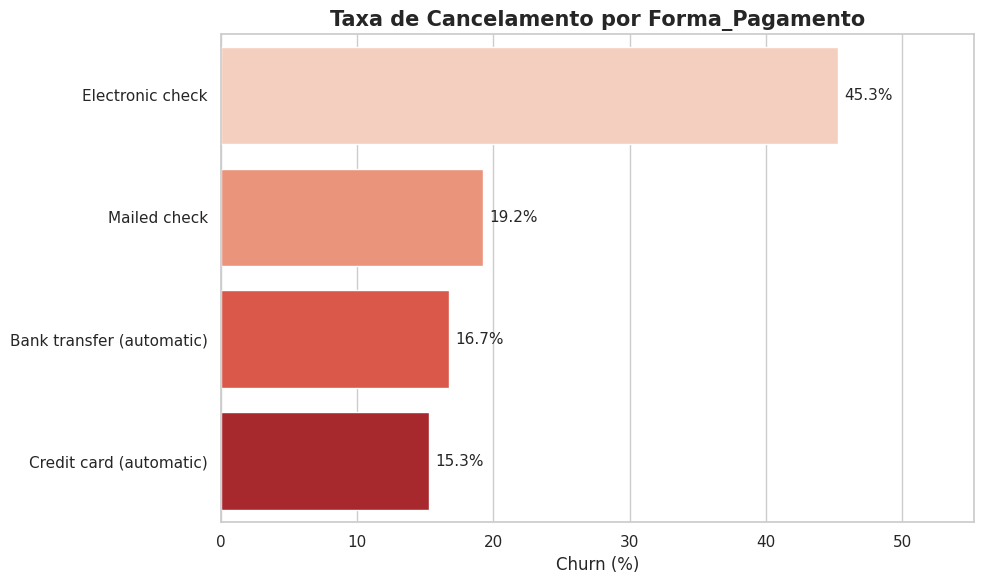

In [41]:
grafico_churn_detalhado('Forma_Pagamento', dados_analise_final)


/tmp/ipython-input-40-3975615643.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=cancelados, x='Percentual', y=coluna, palette='Reds')


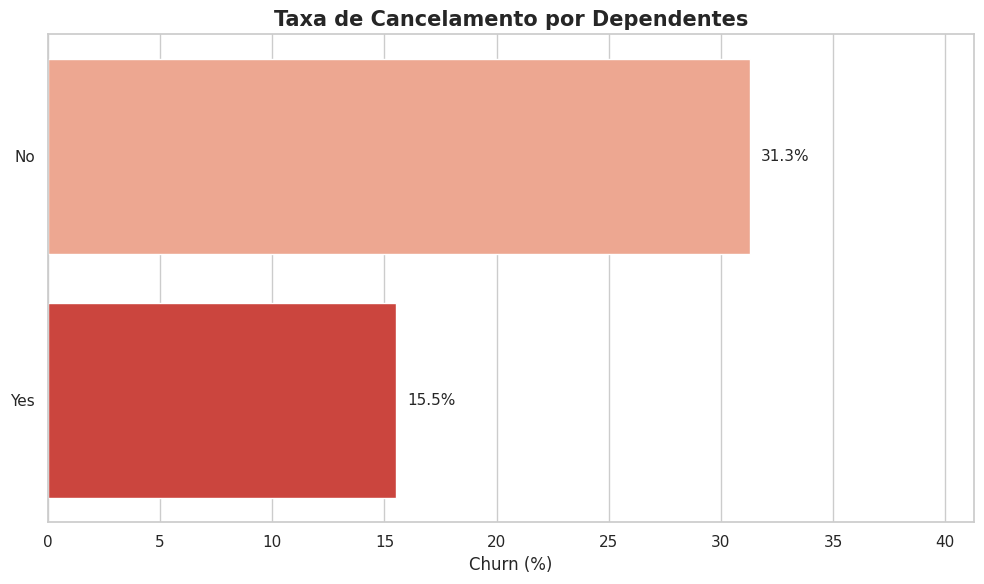

In [42]:
grafico_churn_detalhado('Dependentes', dados_analise_final)


/tmp/ipython-input-40-3975615643.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=cancelados, x='Percentual', y=coluna, palette='Reds')


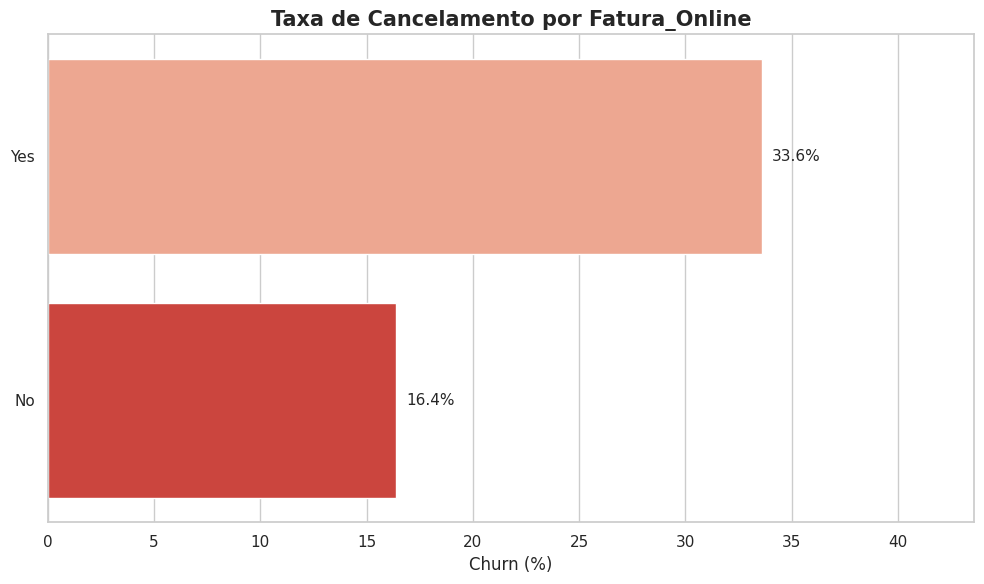

In [43]:
grafico_churn_detalhado('Fatura_Online', dados_analise_final)


In [44]:
def grafico_densidade_churn(coluna_numerica, df):
    plt.figure(figsize=(8, 5))
    sns.set(style='white')
    sns.histplot(data=df, x=coluna_numerica, hue='Cancelado', kde=True,
                 stat='density', palette='husl', common_norm=False, bins=30)

    plt.title(f'Distribuição de {coluna_numerica} por Cancelamento', fontsize=13, weight='bold')
    plt.xlabel(coluna_numerica)
    plt.ylabel('Densidade')
    plt.tight_layout()
    plt.show()


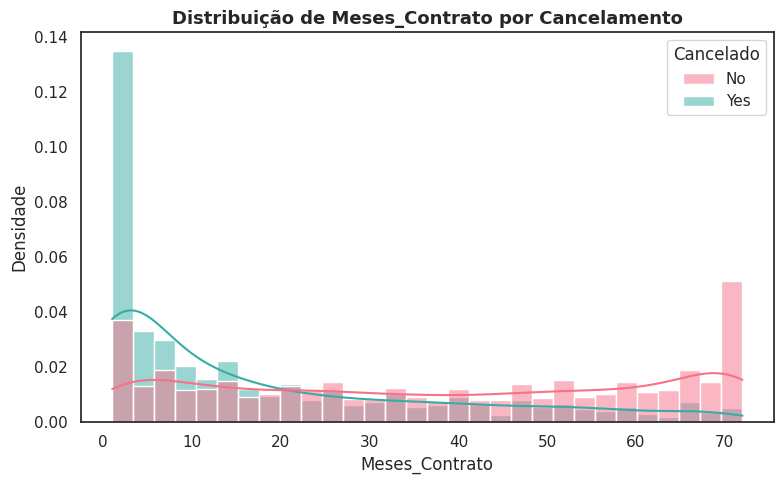

In [46]:

grafico_densidade_churn('Meses_Contrato', dados_analise_final)


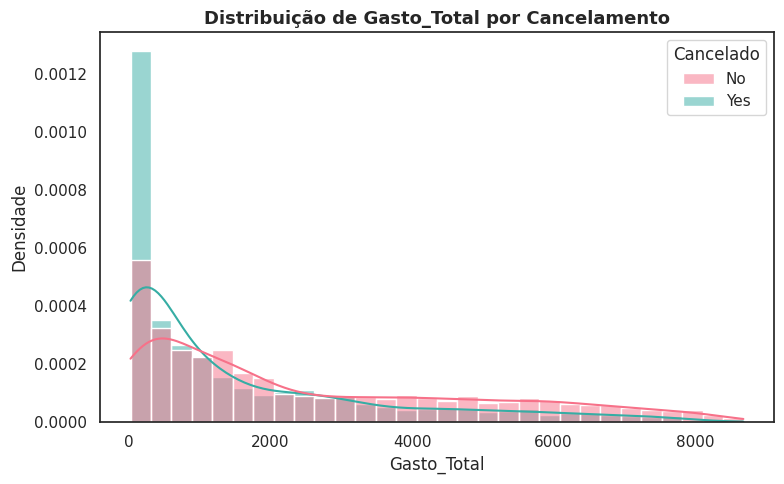

In [47]:
grafico_densidade_churn('Gasto_Total', dados_analise_final)


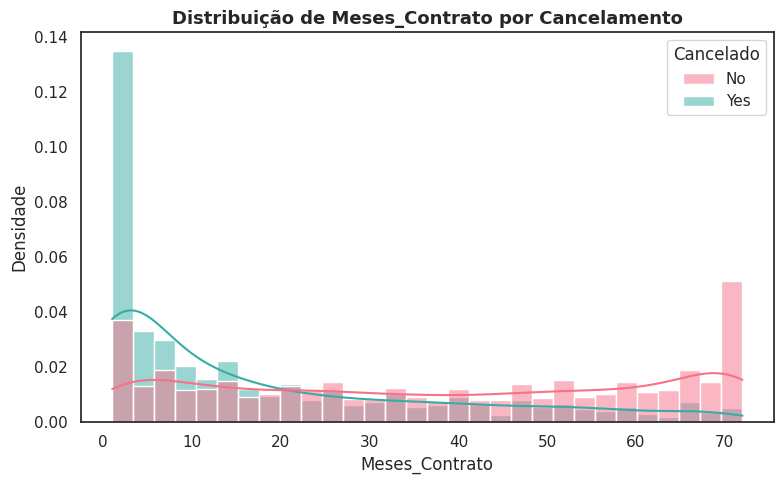

In [48]:
grafico_densidade_churn('Meses_Contrato', dados_analise_final)


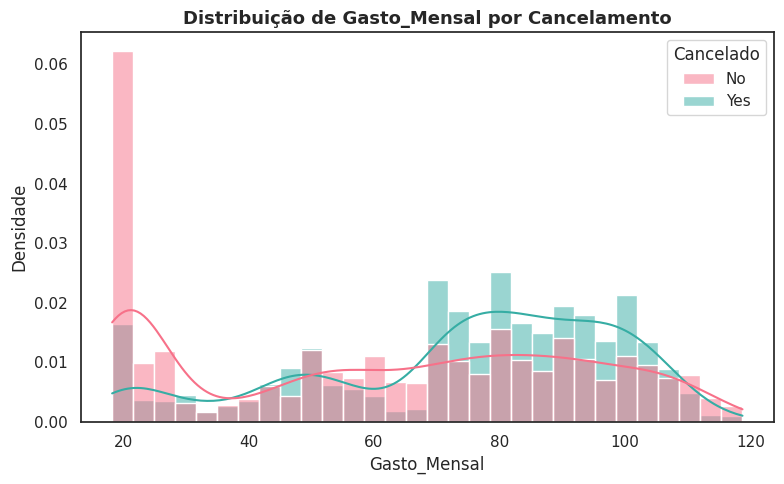

In [49]:
grafico_densidade_churn('Gasto_Mensal', dados_analise_final)


In [50]:
def grafico_violin_churn(coluna_numerica, df):
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(8, 5))
    sns.set(style='whitegrid')

    sns.violinplot(x='Cancelado', y=coluna_numerica, data=df, palette='Pastel1', inner='quartile')

    plt.title(f'Distribuição de {coluna_numerica} por Cancelamento', fontsize=14, weight='bold')
    plt.xlabel('Cancelado')
    plt.ylabel(coluna_numerica)
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-50-2245591491.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cancelado', y=coluna_numerica, data=df, palette='Pastel1', inner='quartile')


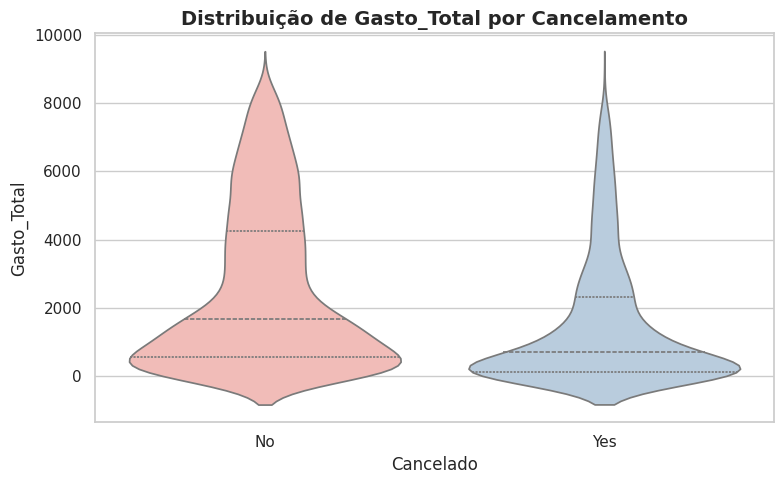

In [51]:
grafico_violin_churn('Gasto_Total', dados_analise_final)


In [54]:
def grafico_churn_por_faixas_contrato(df, coluna='Meses_Contrato'):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd

    # Cria faixas de tempo
    bins = [0, 6, 12, 24, 36, 48, 60, 72]
    labels = ['0-6', '7-12', '13-24', '25-36', '37-48', '49-60', '61-72']
    df['Faixa_Contrato'] = pd.cut(df[coluna], bins=bins, labels=labels, right=True)

    # Calcula taxa de churn por faixa
    grupo = df.groupby('Faixa_Contrato')['Cancelado_Numero'].mean().mul(100).reset_index()

    # Gráfico
    plt.figure(figsize=(8, 5))
    sns.barplot(data=grupo, x='Cancelado_Numero', y='Faixa_Contrato', palette='coolwarm')

    plt.title('Taxa de Cancelamento por Tempo de Contrato (faixas)', fontsize=14, weight='bold')
    plt.xlabel('Taxa de Churn (%)')
    plt.ylabel('Meses de Contrato')
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-54-1725965886.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = df.groupby('Faixa_Contrato')['Cancelado_Numero'].mean().mul(100).reset_index()
/tmp/ipython-input-54-1725965886.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grupo, x='Cancelado_Numero', y='Faixa_Contrato', palette='coolwarm')


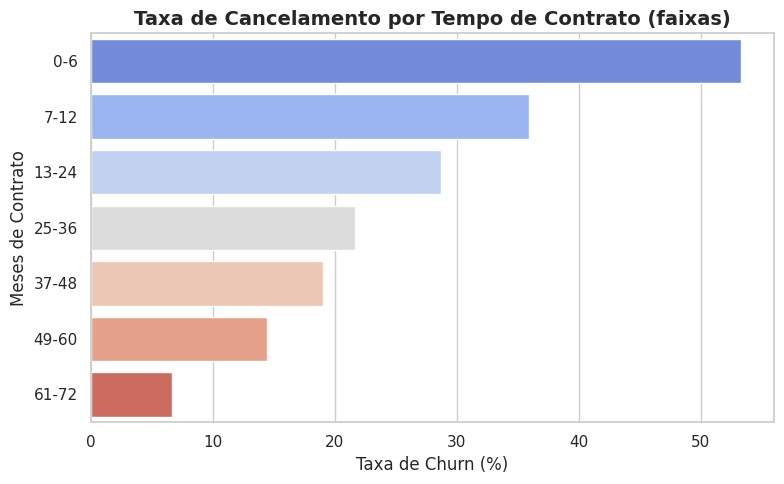

In [55]:
grafico_churn_por_faixas_contrato(dados_analise_final)



#📄Relatorio Final

# `**🔍 Análise de Evasão de Clientes – Telecom X**`


# 🎯 Visão Geral

A análise identificou que cerca de 26,5% dos clientes cancelaram o serviço, enquanto 73,5% permanecem ativos. Esse dado levanta a necessidade de ações específicas para retenção.

## 📊 Análise Categórica de Churn

🔸 Tipo de Contrato

A evasão é significativamente maior entre clientes com contrato mensal.

Já os que optaram por contratos de 1 ou 2 anos demonstraram maior estabilidade.

🔸 Forma de Pagamento

Usuários que utilizam Electronic Check apresentam maior índice de cancelamento.

Métodos automáticos, como cartão de crédito e débito em conta, estão associados a taxas menores de churn.

🔸 Relacionamentos Pessoais

Clientes sem dependentes ou sem parceiro(a) possuem uma chance maior de cancelar.

🔸 Gênero

A variável gênero não demonstrou influência relevante no cancelamento — distribuição muito próxima entre homens e mulheres.




#📈 Análise Numérica de Churn


As variáveis contínuas analisadas foram:

Meses de Contrato (tenure)

Gasto Total

Mensalidade

Gasto Diário Estimado


Padrões observados:

Clientes que cancelaram tendem a ter menos tempo de casa.

O gasto total é menor entre os que saíram — indicando cancelamento precoce.

Em muitos casos, a mensalidade era mais alta entre os churners, o que pode indicar sensibilidade ao preço.

#💡 Insights Relevantes

Churn alto entre clientes recentes, sem dependentes ou parceiro(a), e com contrato mensal.

Pagamentos manuais estão ligados a maior evasão.

Clientes antigos e com gasto acumulado maior são mais fiéis.

#✅ Recomendações Estratégicas

Oferecer benefícios ou bônus nos primeiros meses de contrato, evitando churn precoce.

Estimular contratos de maior duração com vantagens exclusivas.

Incentivar métodos de pagamento automáticos, como cartão ou débito, via cashback ou descontos.

Identificar e acompanhar clientes com maior mensalidade e pouco tempo de casa, pois podem representar risco elevado de cancelamento.

Implementar alertas internos para perfis combinando fatores de risco (mensalidade alta, contrato curto, sem dependentes).

#🔚 Resumo Final

Compreender o comportamento dos clientes que cancelam permite direcionar ações assertivas e prevenir a evasão. Os dados mostram que tempo de vínculo, perfil familiar e método de pagamento são fatores-chave. O próximo passo pode ser a construção de modelos preditivos para antecipar cancelamentos e agir preventivamente.